In [33]:
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
import pandas as pd
import numpy as np
import pypdb as pdb

In [7]:
# load the data from excel files located in this directory
def load_data():
    # Read the peptides data (in excel format) extracted from the website:
    # http://opm.phar.umich.edu/types.php
    transmembrane = pd.read_excel("1_Transmembrane_type.xlsx", "Sheet1")
    monotopic = pd.read_excel("2_Monotopic_type.xlsx", "Sheet1")
    peptides = pd.read_excel("3_Peptides_type.xlsx", "Sheet1")
    
    # Concatenate the 3 dataframes together to get a master list of proteins
    return pd.concat([transmembrane, monotopic, peptides], keys =["transmembrane", "monotopic", "peptides"], ignore_index=True)


# search the PDB database for matches to a give query
# and return a subset of a given dataframe
# which contains matching 'PDB_ID's
def find_matches(query, df):
    # make a PDB database query and perform a search,
    # then convert the results to lower case
    search_results = [x.lower() for x in pdb.do_search(pdb.make_query(query))]
    return df[df['PDB_ID'].isin(search_results)]



In [16]:
df = load_data()
# matches = find_matches('transmembrane homosapiens',df)
# matches.shape
df.head()
df.columns
df.shape

,Family,Protein_Name,PDB_ID,Species,Localization,Num_Subunits,Num_TM_Sec_Structs,Hydrophobic_Thickness or_Depth,Tilt _Angle,Gtransfer
0,1.1.01.01.,"Sodium pumping rhodopsin, NaR, pentamer",4xto,Dokdonia eikasta,Bact. Gram-neg inner,5,35,29.8,0.0,-170.3
1,1.1.01.01.,Xanthorhodopsin,3ddl,Salinibacter ruber,Bact. Gram-neg inner,1,7,28.2,11.0,-60.7
2,1.1.01.01.,Archaerhodopsin-1,1uaz,Halobacterium sp.,Archaebac.,1,7,31.8,9.0,-65.3
3,1.1.01.01.,Chimaera of channelrhodopsins 1 and 2,3ug9,Chlamydomonas reinhardtii,Eukaryo. plasma,2,14,31.0,0.0,-100.3
4,1.1.01.01.,"Halorhodopsin, different conformation",3vvk,Natronomonas pharaonis,Archaebac.,3,21,33.6,0.0,-140.5


Index(['Family', 'Protein_Name', 'PDB_ID', 'Species', 'Localization',
       'Num_Subunits', 'Num_TM_Sec_Structs', 'Hydrophobic_Thickness or_Depth ',
       'Tilt _Angle ', 'Gtransfer'],
      dtype='object')

(3603, 10)

In [ ]:
# plot the average thickness of all the membranes



In [14]:
df.groupby('Localization').mean()


,Num_Subunits,Num_TM_Sec_Structs,Hydrophobic_Thickness or_Depth,Tilt _Angle,Gtransfer
Localization,,,,,
Archaebac.,2.547368,14.421053,28.182105,10.589474,-93.977895
Bact. Gram-neg inner,2.990020,13.423154,25.062475,16.854291,-89.290419
Bact. Gram-neg outer,1.974138,19.056034,21.485345,12.659483,-64.028448
Bact. Gram-pos cell wall,1.700000,1.600000,7.990000,41.600000,-13.270000
Bact. Gram-pos plas.,2.270833,8.569444,21.738889,24.909722,-68.345833
Chloroplast inner,2.000000,6.666667,12.600000,59.000000,-50.466667
Chloroplast outer,2.000000,0.000000,3.150000,88.000000,-6.600000
Endoplasm. reticulum,1.599057,4.193396,15.790521,43.797170,-35.536792
Endosome,1.122807,0.631579,8.924561,60.824561,-13.080702


In [10]:
import seaborn as sns

In [17]:
sub_df = df[df['Localization']=='Bact. Gram-neg outer']
sub_df.head()
sub_df.shape

,Family,Protein_Name,PDB_ID,Species,Localization,Num_Subunits,Num_TM_Sec_Structs,Hydrophobic_Thickness or_Depth,Tilt _Angle,Gtransfer
472,1.1.115.01.,"MlaA protein, with OMPF (E. coli)",5nuo,Klebsiella pneumoniae,Bact. Gram-neg outer,6,54,23.4,0.0,-181.3
473,1.1.115.01.,"MlaA protein, with OMPF",5nup,Klebsiella pneumoniae,Bact. Gram-neg outer,6,54,23.0,0.0,-190.1
474,1.1.115.01.,"MlaA protein, with OMPF (E. coli)",5nuq,Serratia marcescens,Bact. Gram-neg outer,4,50,23.8,1.0,-148.6
1068,1.1.73.01.,Outer membrane complex of type IV secretion sy...,3jqo,Escherichia coli,Bact. Gram-neg outer,14,14,22.6,0.0,-67.4
1069,1.1.73.01.,TrbI protein,2bhv,Helicobacter pylori,Bact. Gram-neg outer,1,0,3.1,42.0,-6.4


(232, 10)

In [19]:
# is there a relationship 
# thickness num TM sec structs, tilt angle, g transfer 

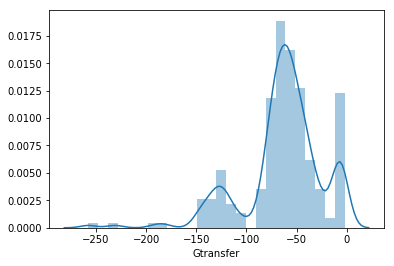

In [37]:
import seaborn as sns
import matplotlib as plt
sns.distplot(sub_df.Gtransfer)

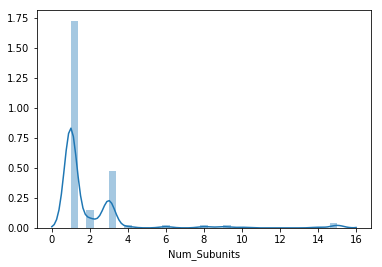

In [38]:
sns.distplot(sub_df.Num_Subunits)

In [41]:
sub_df['Gtransfer']

472    -181.3
473    -190.1
474    -148.6
1068    -67.4
1069     -6.4
1092    -70.6
1093    -79.2
1095    -67.1
1286   -123.8
1287    -22.1
1495     -8.7
1511    -29.5
1512    -35.6
1514    -26.8
1515    -32.2
1516    -31.6
1517    -30.7
1518    -40.5
1519    -34.2
1520    -42.9
1521    -30.2
1522    -16.4
1523    -39.6
1524    -25.7
1525    -38.3
1526    -31.3
1527    -32.5
1528    -41.1
1529    -50.3
1530    -38.3
        ...  
1729    -84.6
1730    -47.9
1731    -42.5
1733   -147.2
1734   -145.8
1735   -257.6
1736   -231.2
1744     -2.2
1847     -6.2
1857     -5.9
1874     -7.0
2037     -8.0
2038     -7.8
2039     -8.2
2040     -4.6
2045     -7.5
2091     -4.6
2138     -5.6
2289     -5.0
2295     -8.5
2296     -6.9
2297     -6.4
2524     -6.2
2525     -8.2
2526     -5.9
2532     -9.9
2533    -12.0
2534     -8.5
2738    -20.3
3060     -4.6
Name: Gtransfer, Length: 232, dtype: float64